<a href="https://www.kaggle.com/code/peacehegemony/insights-on-electricity-access-in-rural-areas?scriptVersionId=118519207" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Setup
First, we'll need to install the geopandas library and import it, as well as pandas and matplotlib for data manipulation and visualization, respectively.

In [1]:
!pip install geopandas

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt


plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 300

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
#!kaggle datasets download -d <username/dataset_name>

df = pd.read_csv("/kaggle/input/tanzania-minigrid-locations/Tanzania_minigridstan.csv")


# Data Exploration
Let's start by taking a look at the first few rows of the dataset to get a sense of the data.

In [3]:
df.head()

,Name,Type,X,Y,River,Basin,Village,Ward,District,Region,...,Owner,Head_m,Flow_m3/s,Num_gensets,Turbine,Canal_m,Penstock_m,Dam_type,Height_m,Width_m
0,Leganga,Solar,36.369,-5.714,NaN,NaN,Leganga,Chitego,Kongwa,Dodoma,...,Community,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ngutoto,Solar,36.332,-5.596,NaN,NaN,Ngutoto,Chitego,Kongwa,Dodoma,...,Community,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Lobilo,Solar,36.818,-5.996,NaN,NaN,Lobilo,Lenjulu,Kongwa,Dodoma,...,Community,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Silale,Solar,36.536,-5.754,NaN,NaN,Silale,Makawa,Kongwa,Dodoma,...,Community,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tura,Solar,33.843,-5.495,NaN,NaN,Tura,Tura,Uyui,Tabora,...,Community,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see that the dataset includes various details about the mini-grids, such as the name, type of technology used, coordinates, location, and year established. It also includes information about the capacity, transmission, customers, payment methods, and infrastructure of the mini-grids.

We can also get an overview of the dataset by using the describe() function.

In [4]:
df.describe()

,X,Y,Cap2_KW,No_villages,Cust_comm
count,107.000000,107.000000,2.00000,4.000000,8.000000
mean,34.956019,-6.954860,46.00000,7.250000,32.875000
std,2.610101,2.908256,19.79899,7.135592,26.973201
min,29.637000,-11.050000,32.00000,1.000000,1.000000
25%,32.832500,-9.483000,39.00000,2.500000,16.250000
50%,35.105000,-7.568000,46.00000,5.500000,25.500000
75%,36.831500,-4.544000,53.00000,10.250000,50.500000
max,40.181000,-1.218000,60.00000,17.000000,76.000000


This gives us a summary of the numerical columns in the dataset, including the count, mean, standard deviation, minimum, and maximum values.

It's also useful to see the number of null values in each column. We can do this using the isnull().sum() function.

In [5]:
df.isnull().sum()

Name             0
Type             0
X                2
Y                2
River           69
Basin           60
Village          9
Ward            98
District         3
Region           0
Year            11
Tech             1
Cap_KW           0
Tech2          107
Cap2_KW        107
Trans_KV        37
Trans_KM        84
No_Transf      102
No_villages    105
Cust_hh         74
Cust_comm      101
Cust_pub        91
Cust_tot        59
Payment          1
Metering        96
Connected       19
Remarks         18
Owner            0
Head_m          96
Flow_m3/s       95
Num_gensets     98
Turbine         88
Canal_m         97
Penstock_m      96
Dam_type        95
Height_m        98
Width_m         97
dtype: int64

# Visualizing the Data
One way to get a sense of the distribution of the data is to create visualizations. Let's start by creating a map of the mini-grid locations.

First, we'll need to create a GeoDataFrame from the dataset.

In [6]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.X, df.Y)
)

Next, we'll use the plot() function from geopandas to create a map of the mini-grid locations.

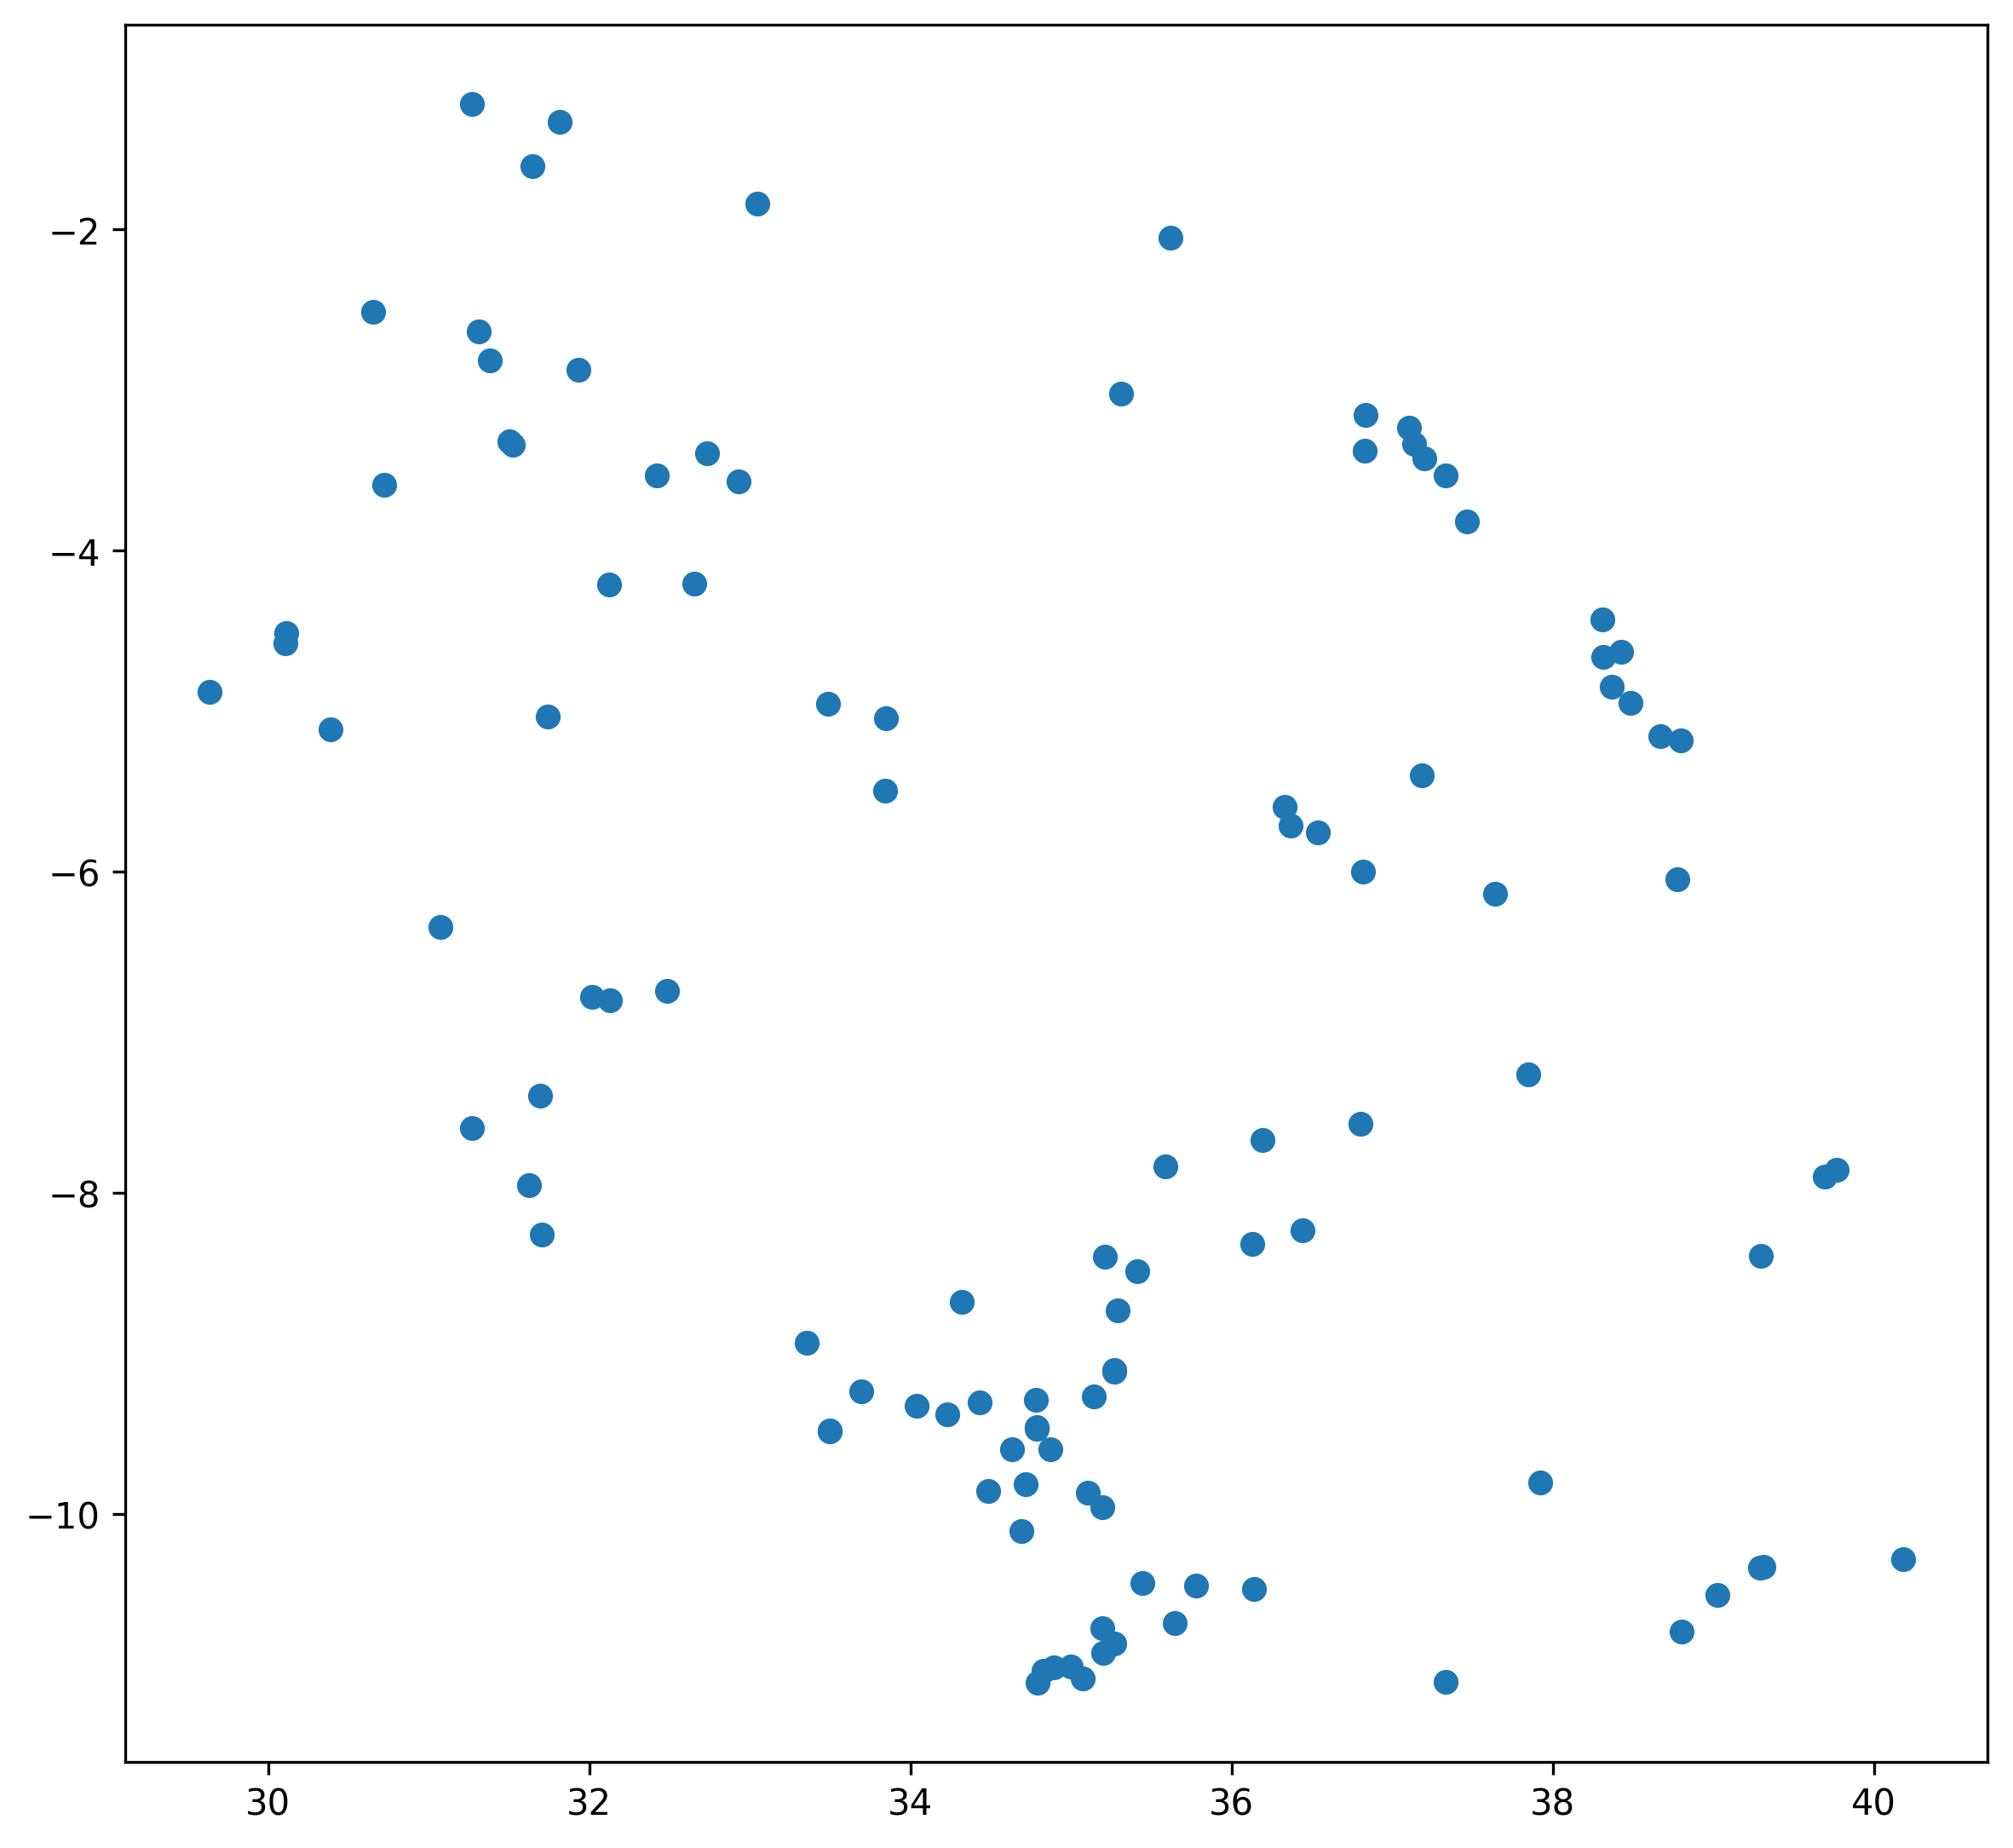

In [7]:
gdf.plot()
plt.show()

We can also use matplotlib to create histograms of the numerical columns. For example, let's look at the distribution of the capacity of the mini-grids.

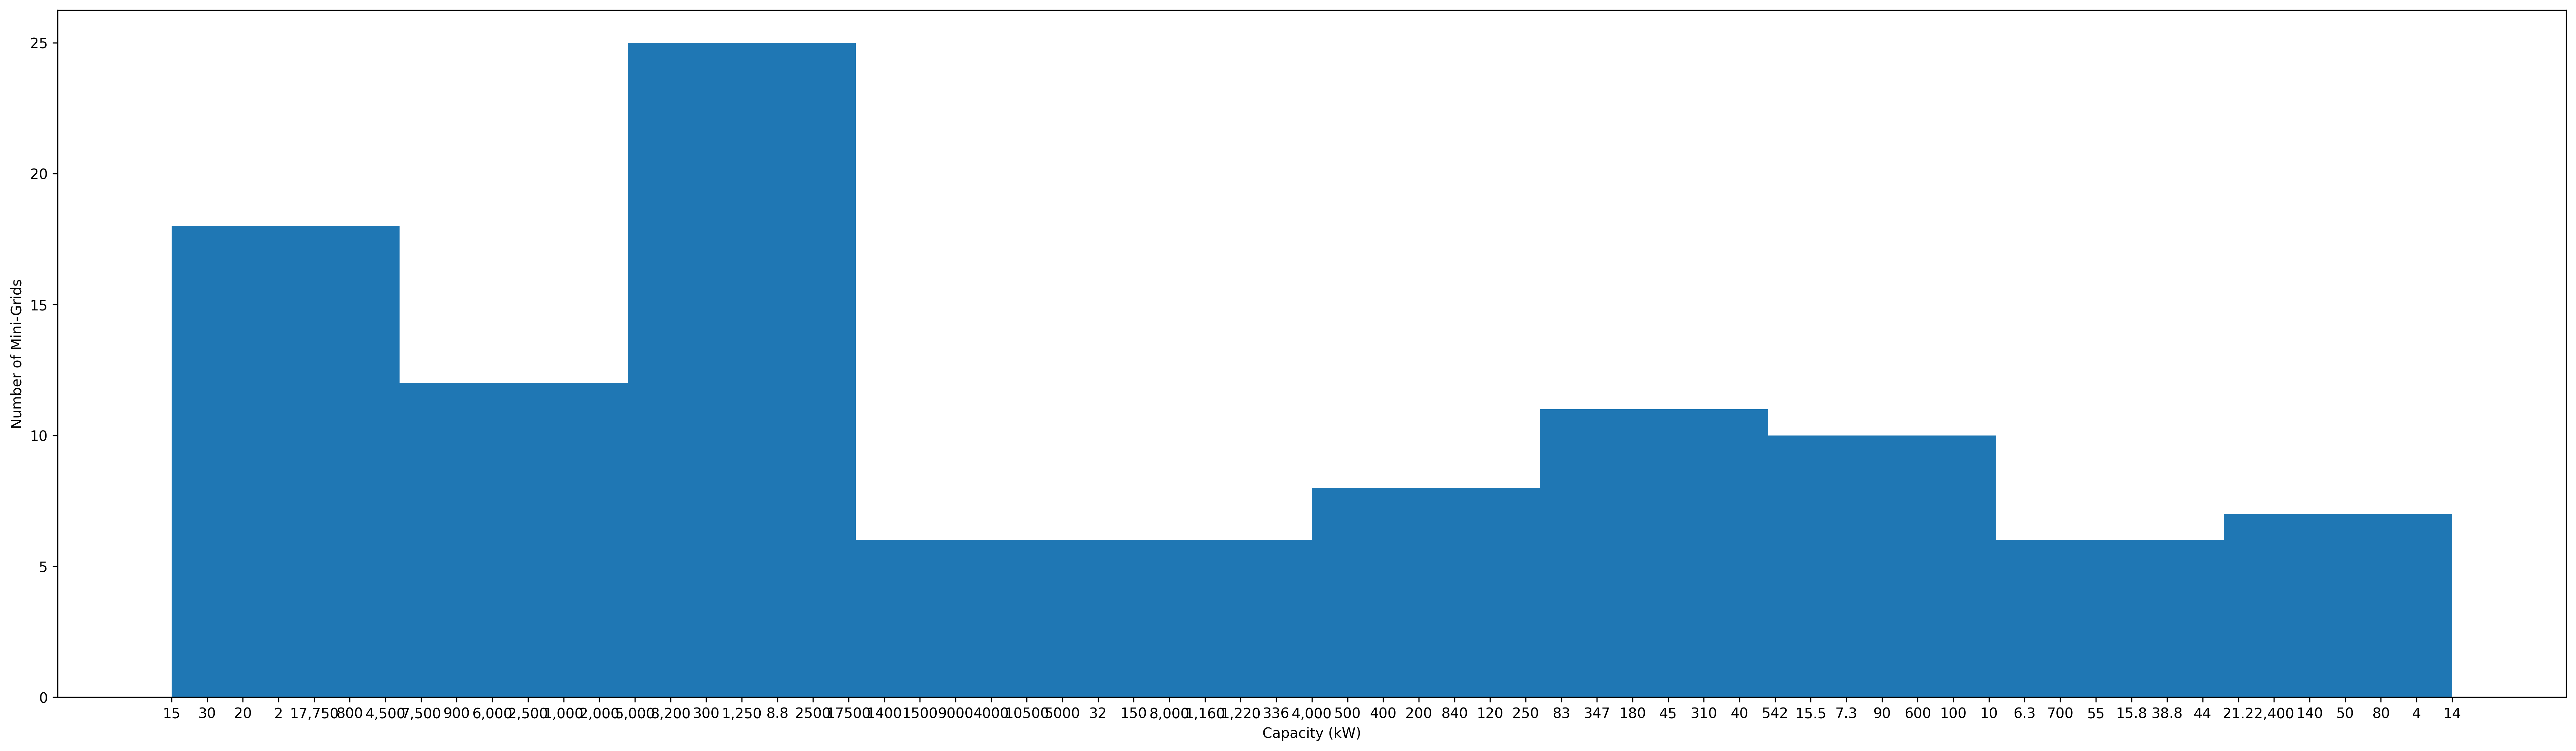

In [8]:
plt.figure(figsize=(32, 9), dpi=300)
plt.hist(df.Cap_KW)
plt.xlabel("Capacity (kW)")
plt.ylabel("Number of Mini-Grids")
plt.show()

# Technology Types
We can investigate the types of technology used in the mini-grids. Let's start by creating a bar plot of the technology types.

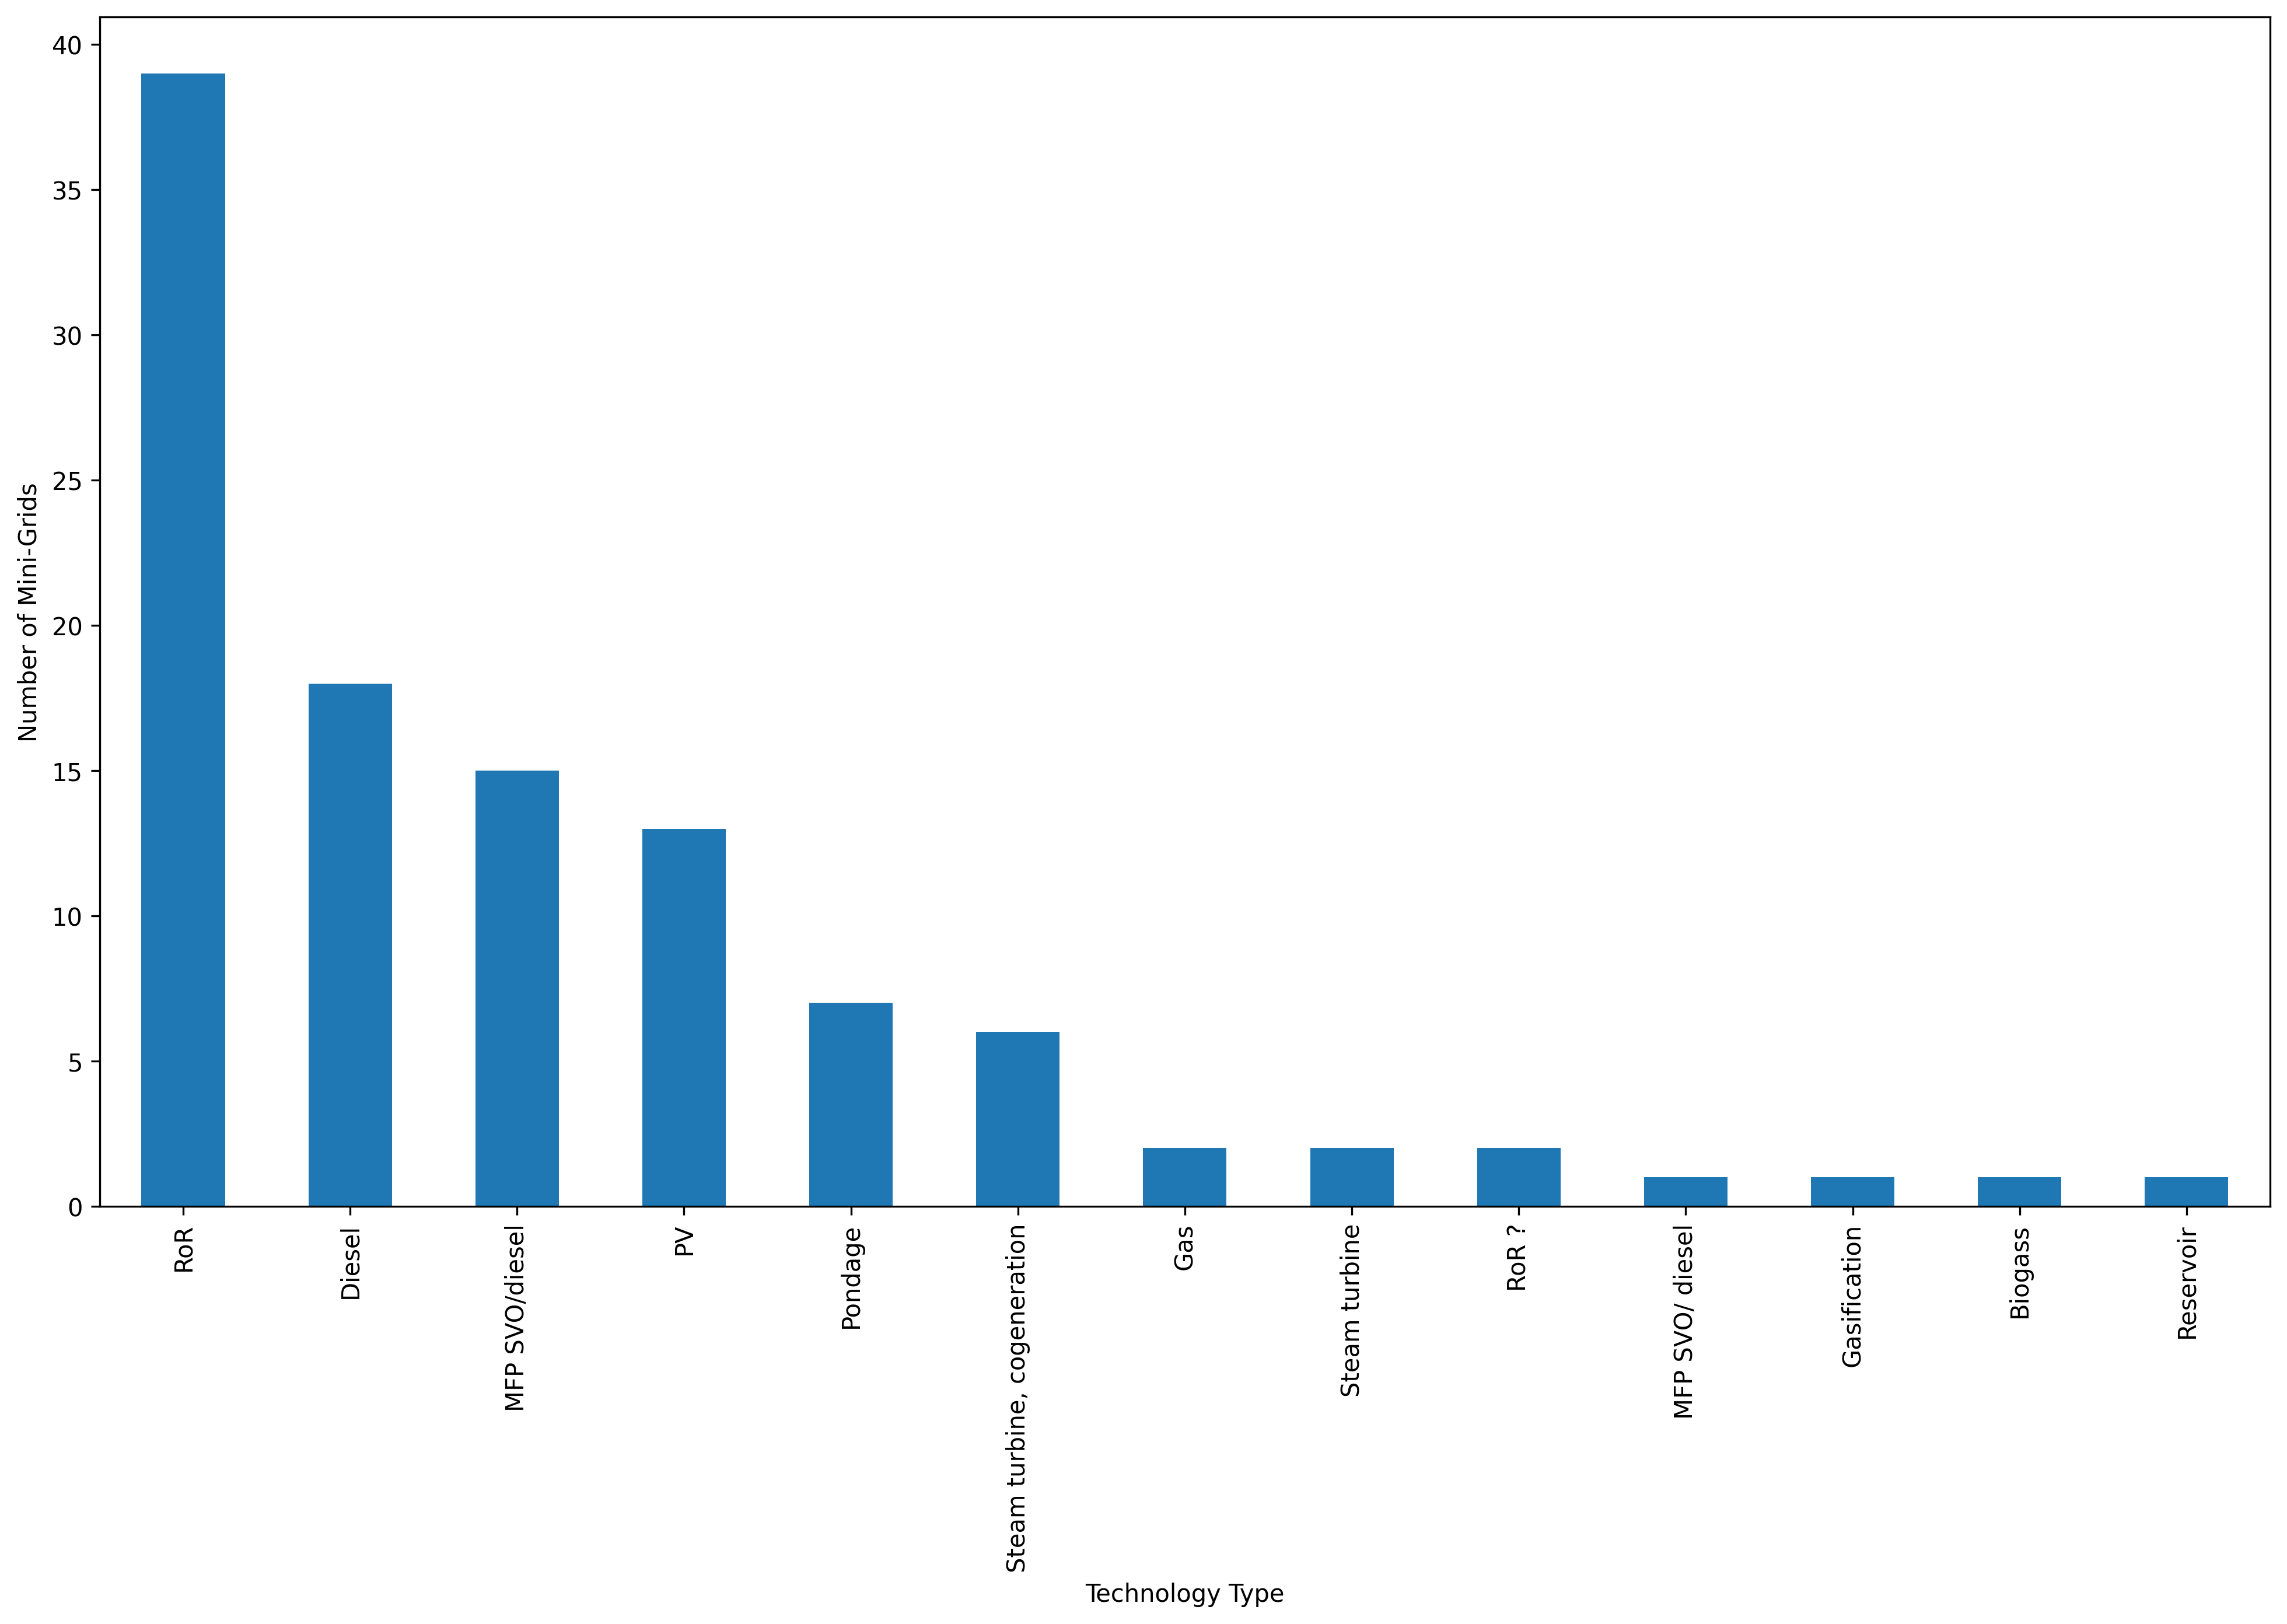

In [9]:
tech_counts = df["Tech"].value_counts()
tech_counts.plot(kind="bar")
plt.xlabel("Technology Type")
plt.ylabel("Number of Mini-Grids")
plt.show()

We can also investigate the distribution of technology types by region. To do this, we can use the groupby() function to group the data by region, and then use the plot() function to create a bar plot.

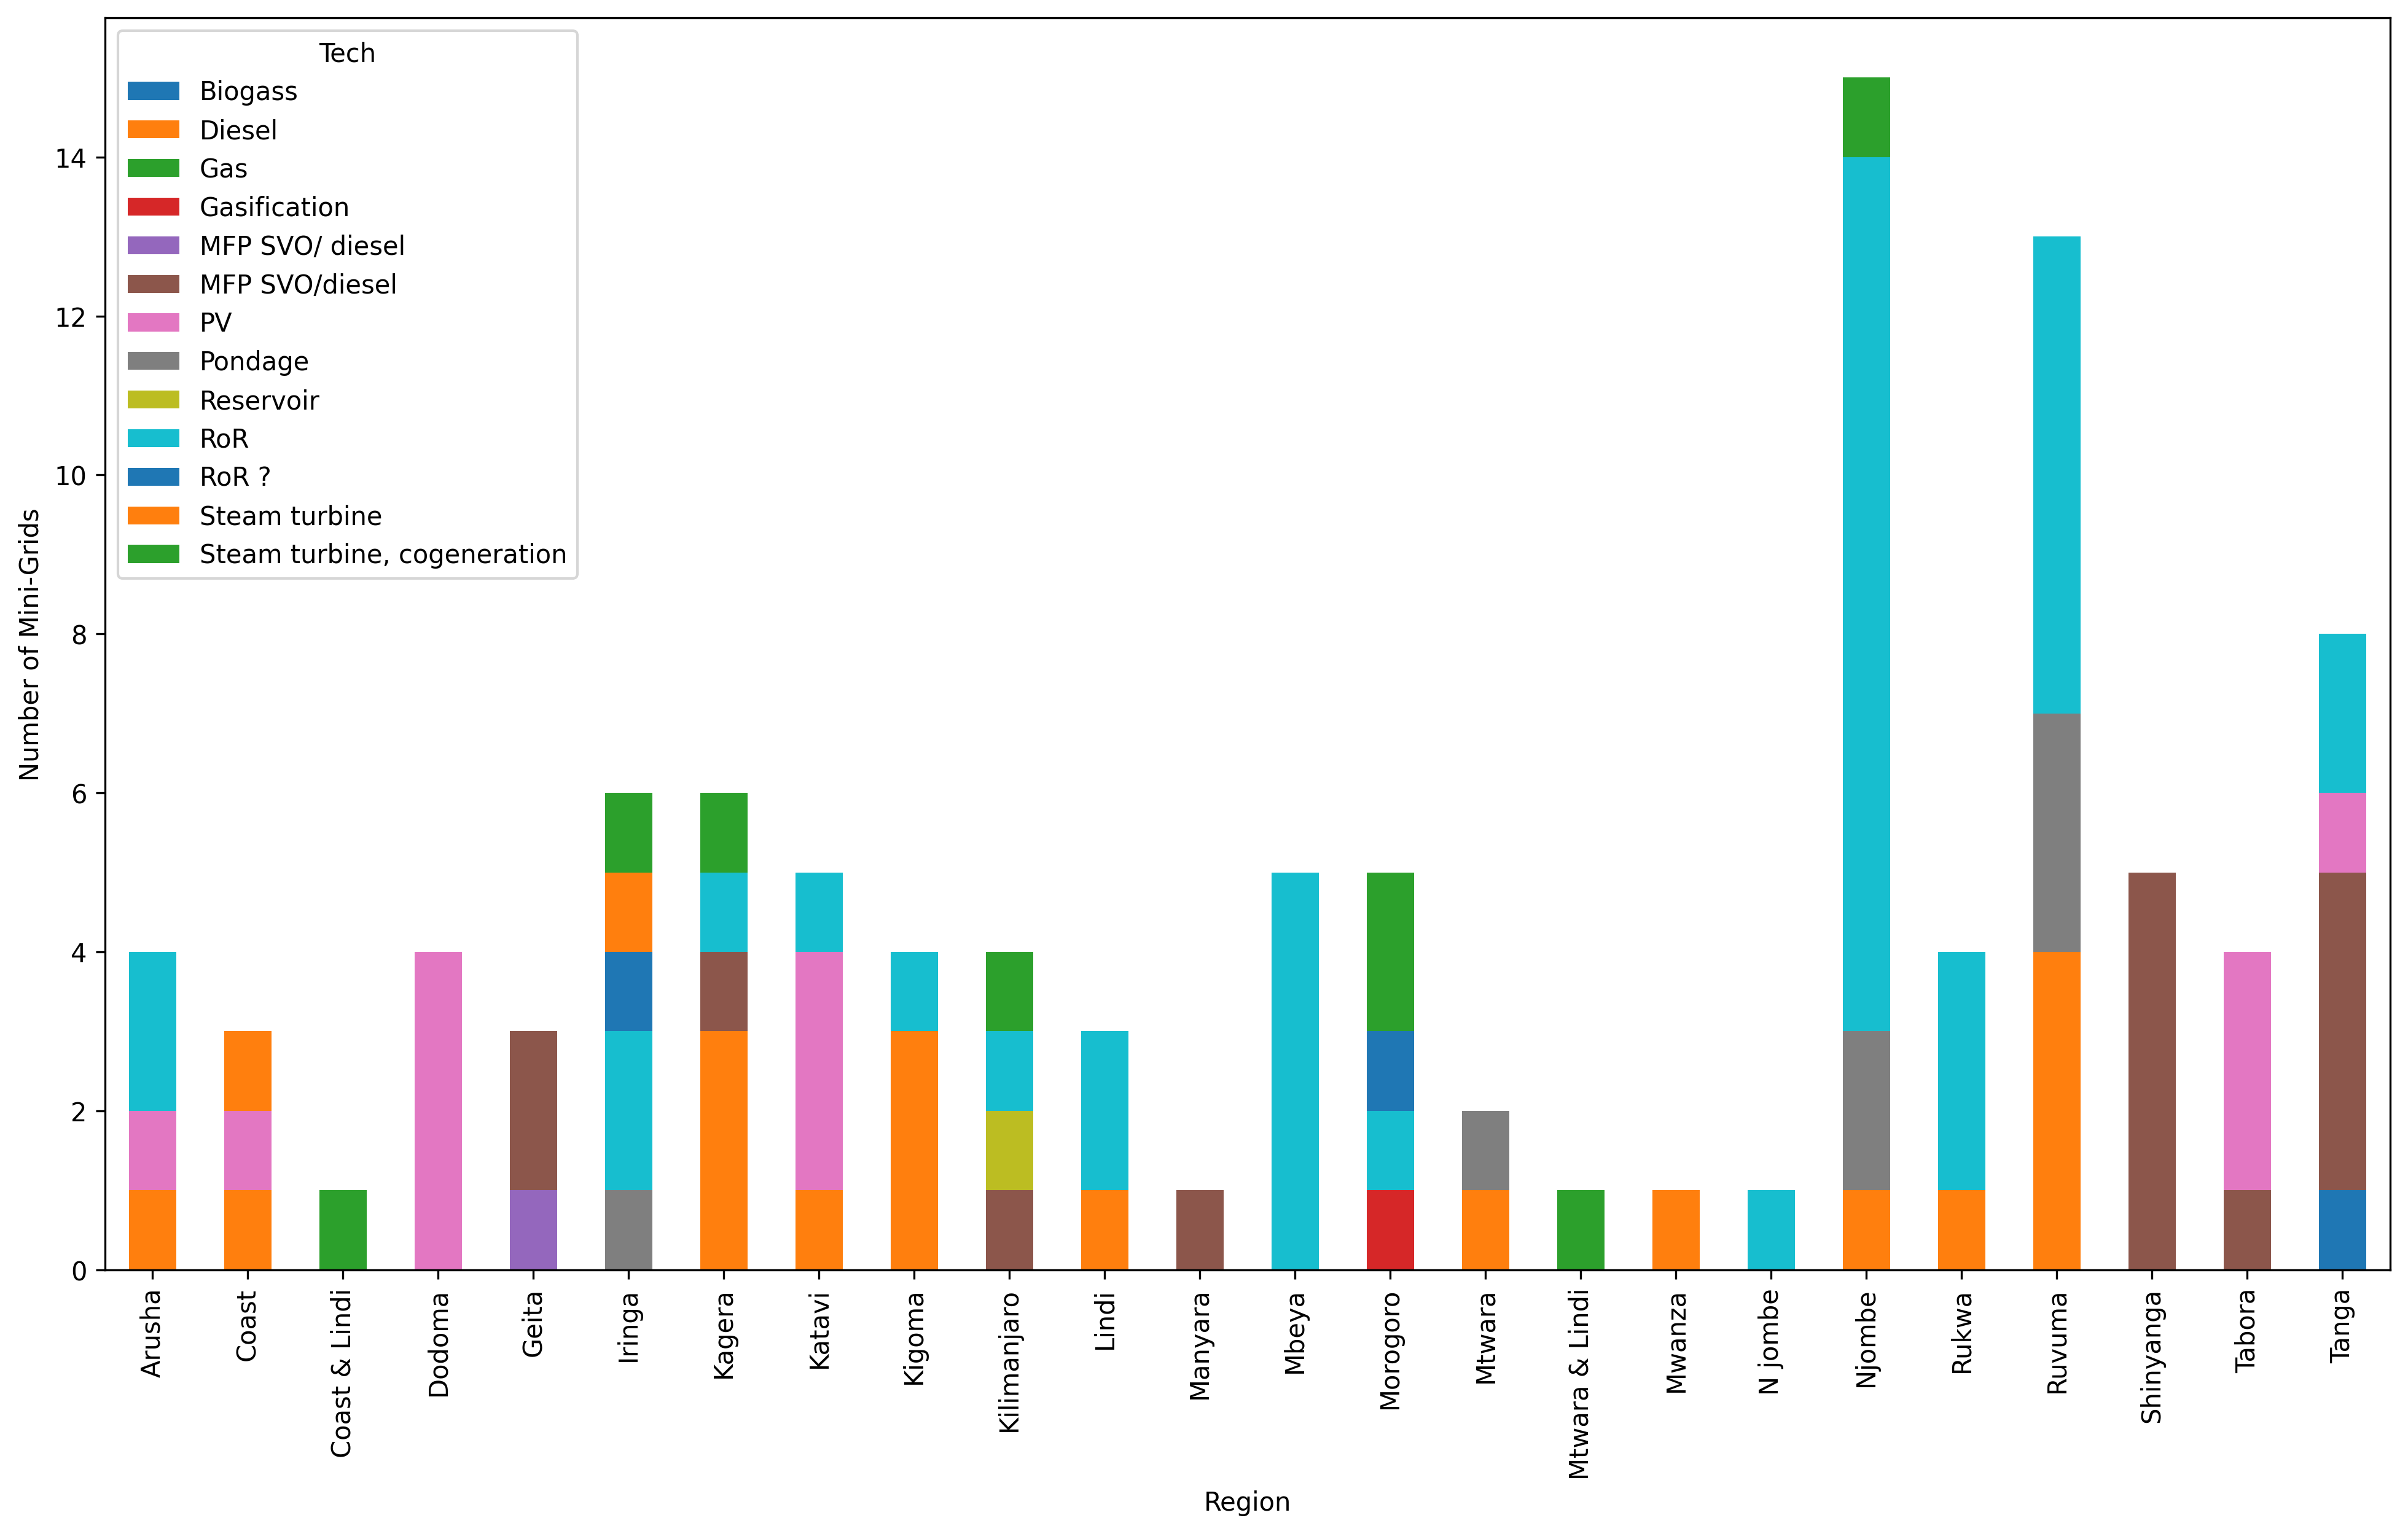

In [10]:
tech_by_region = df.groupby("Region")["Tech"].value_counts().unstack()
tech_by_region.plot(kind="bar", stacked=True)
plt.xlabel("Region")
plt.ylabel("Number of Mini-Grids")
plt.show()

# Customer Statistics
We can also look at the number of customers served by the mini-grids. Let's start by creating a bar plot of the number of household customers.

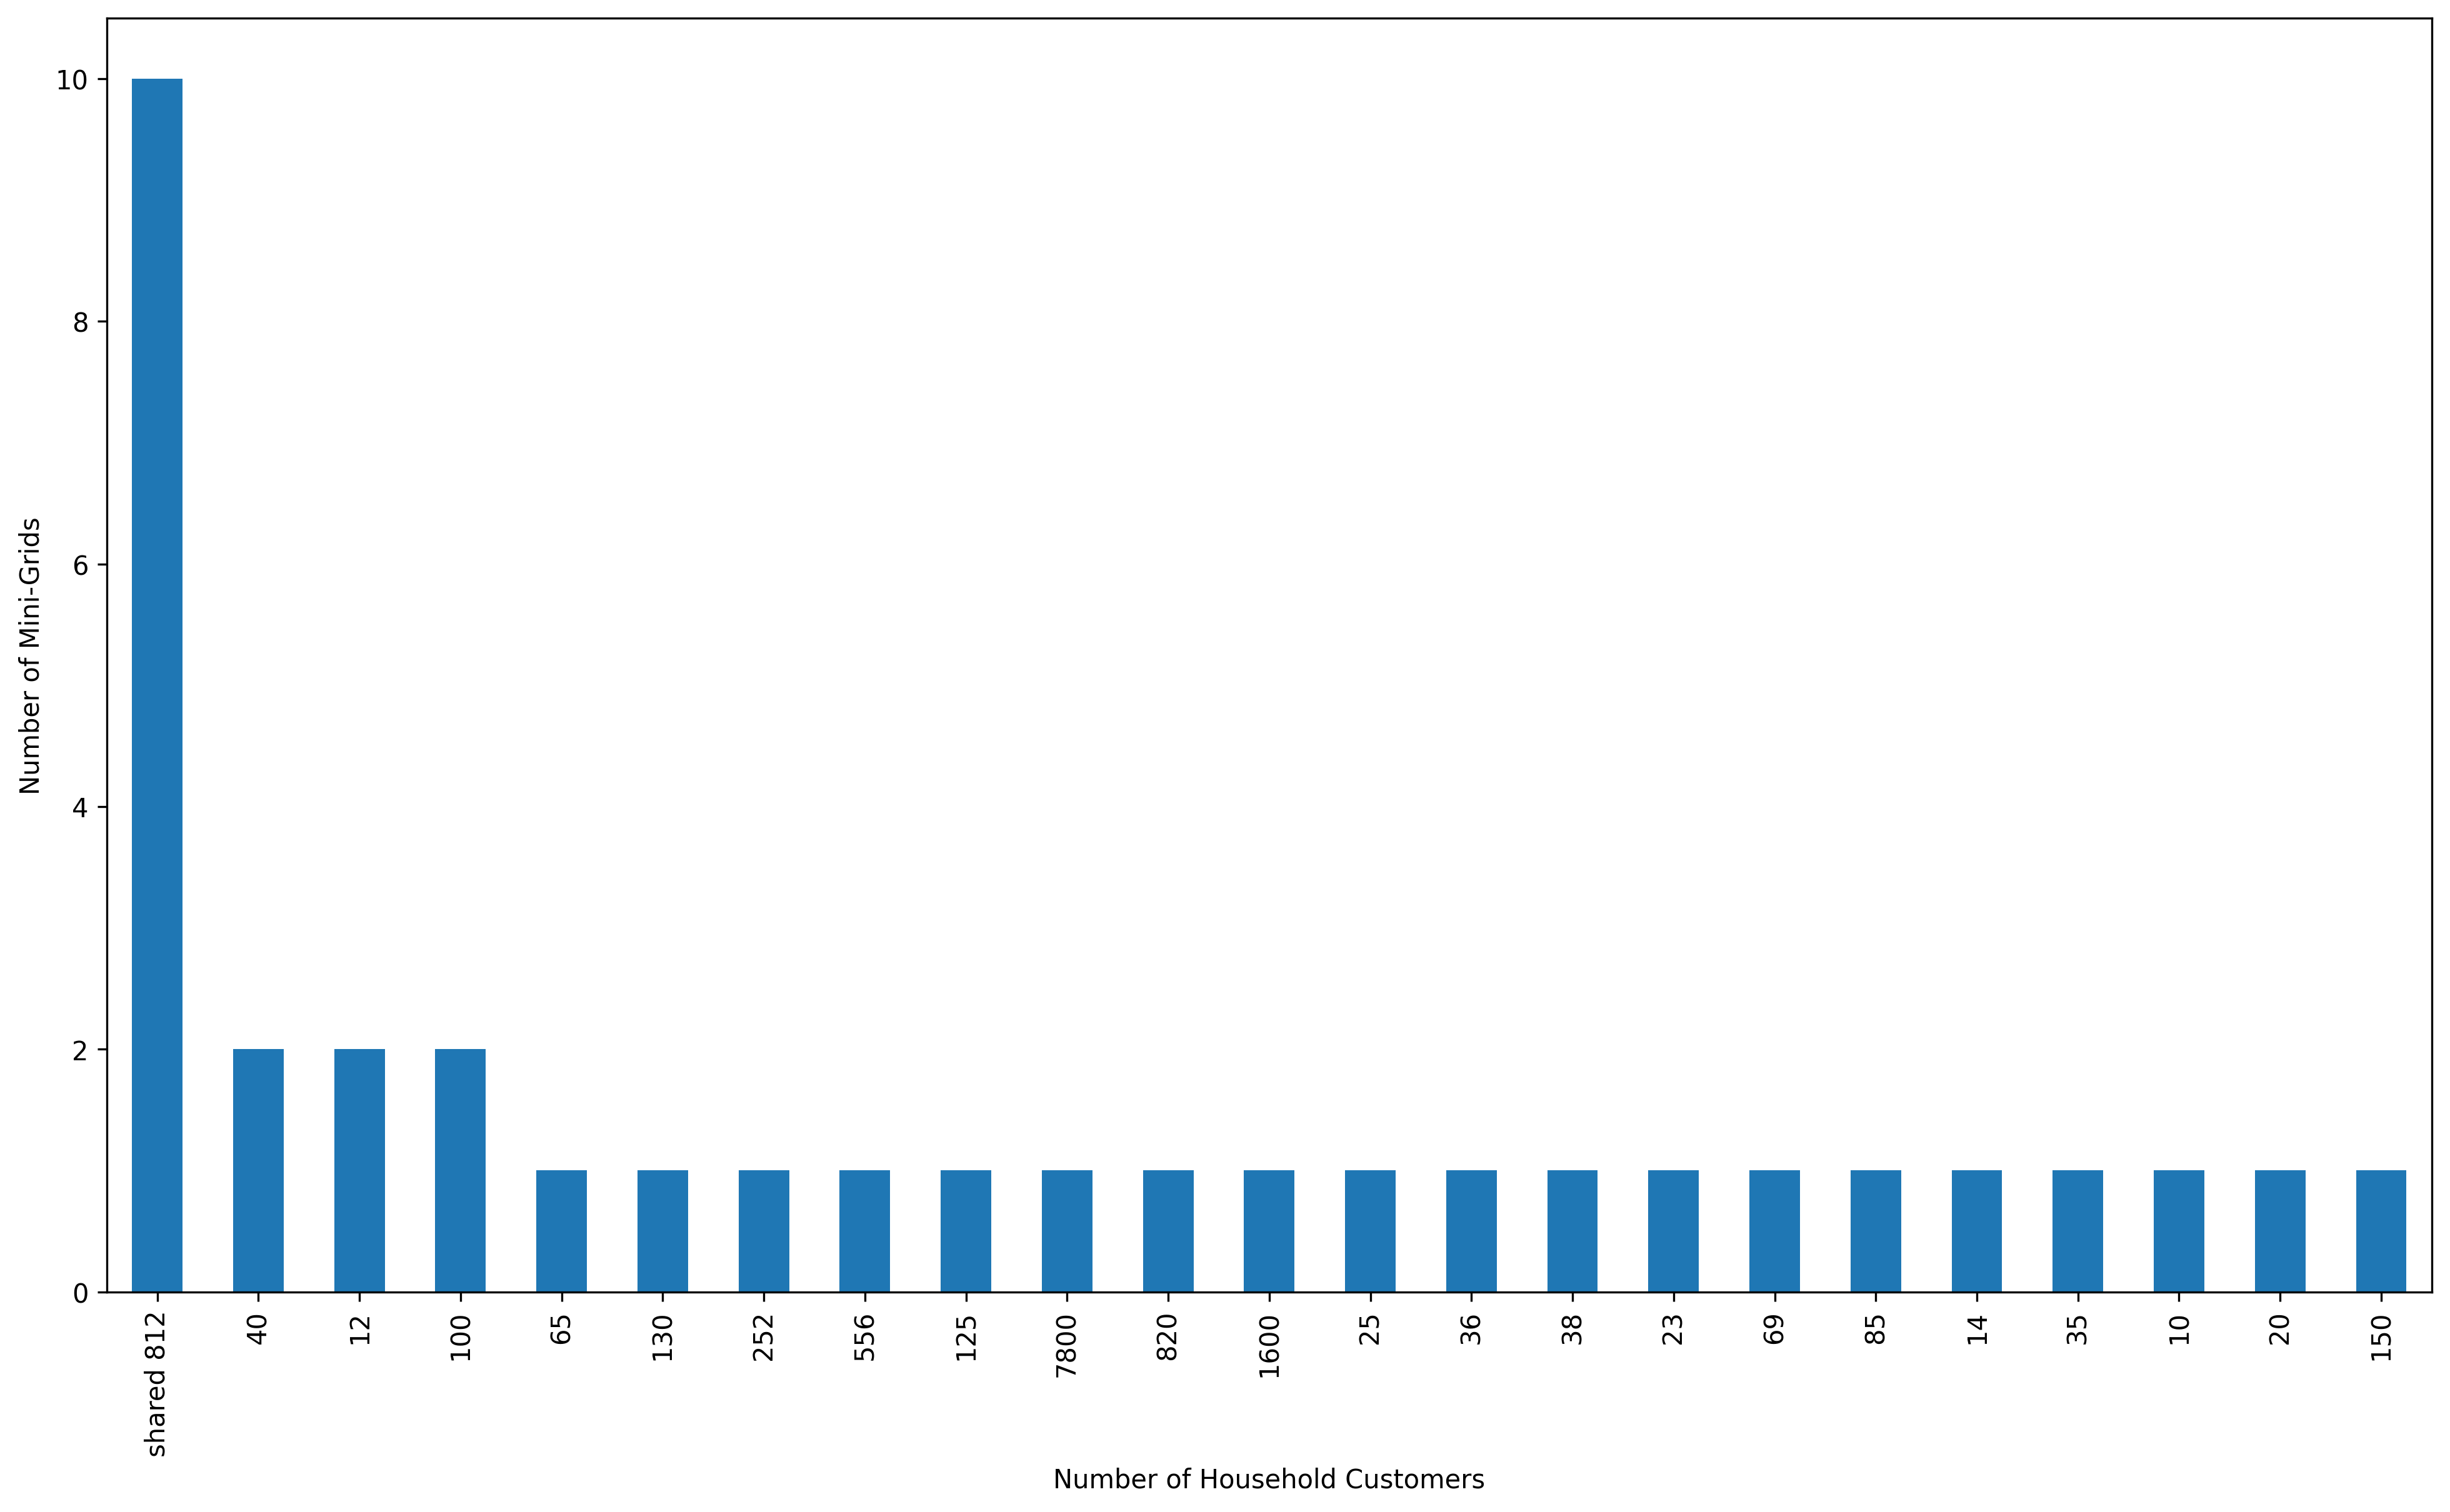

In [11]:
hh_counts = df["Cust_hh"].value_counts()
hh_counts.plot(kind="bar")
plt.xlabel("Number of Household Customers")
plt.ylabel("Number of Mini-Grids")
plt.show()

We can also investigate the total number of customers served by the mini-grids. To do this, we can create a histogram of the Cust_tot column.

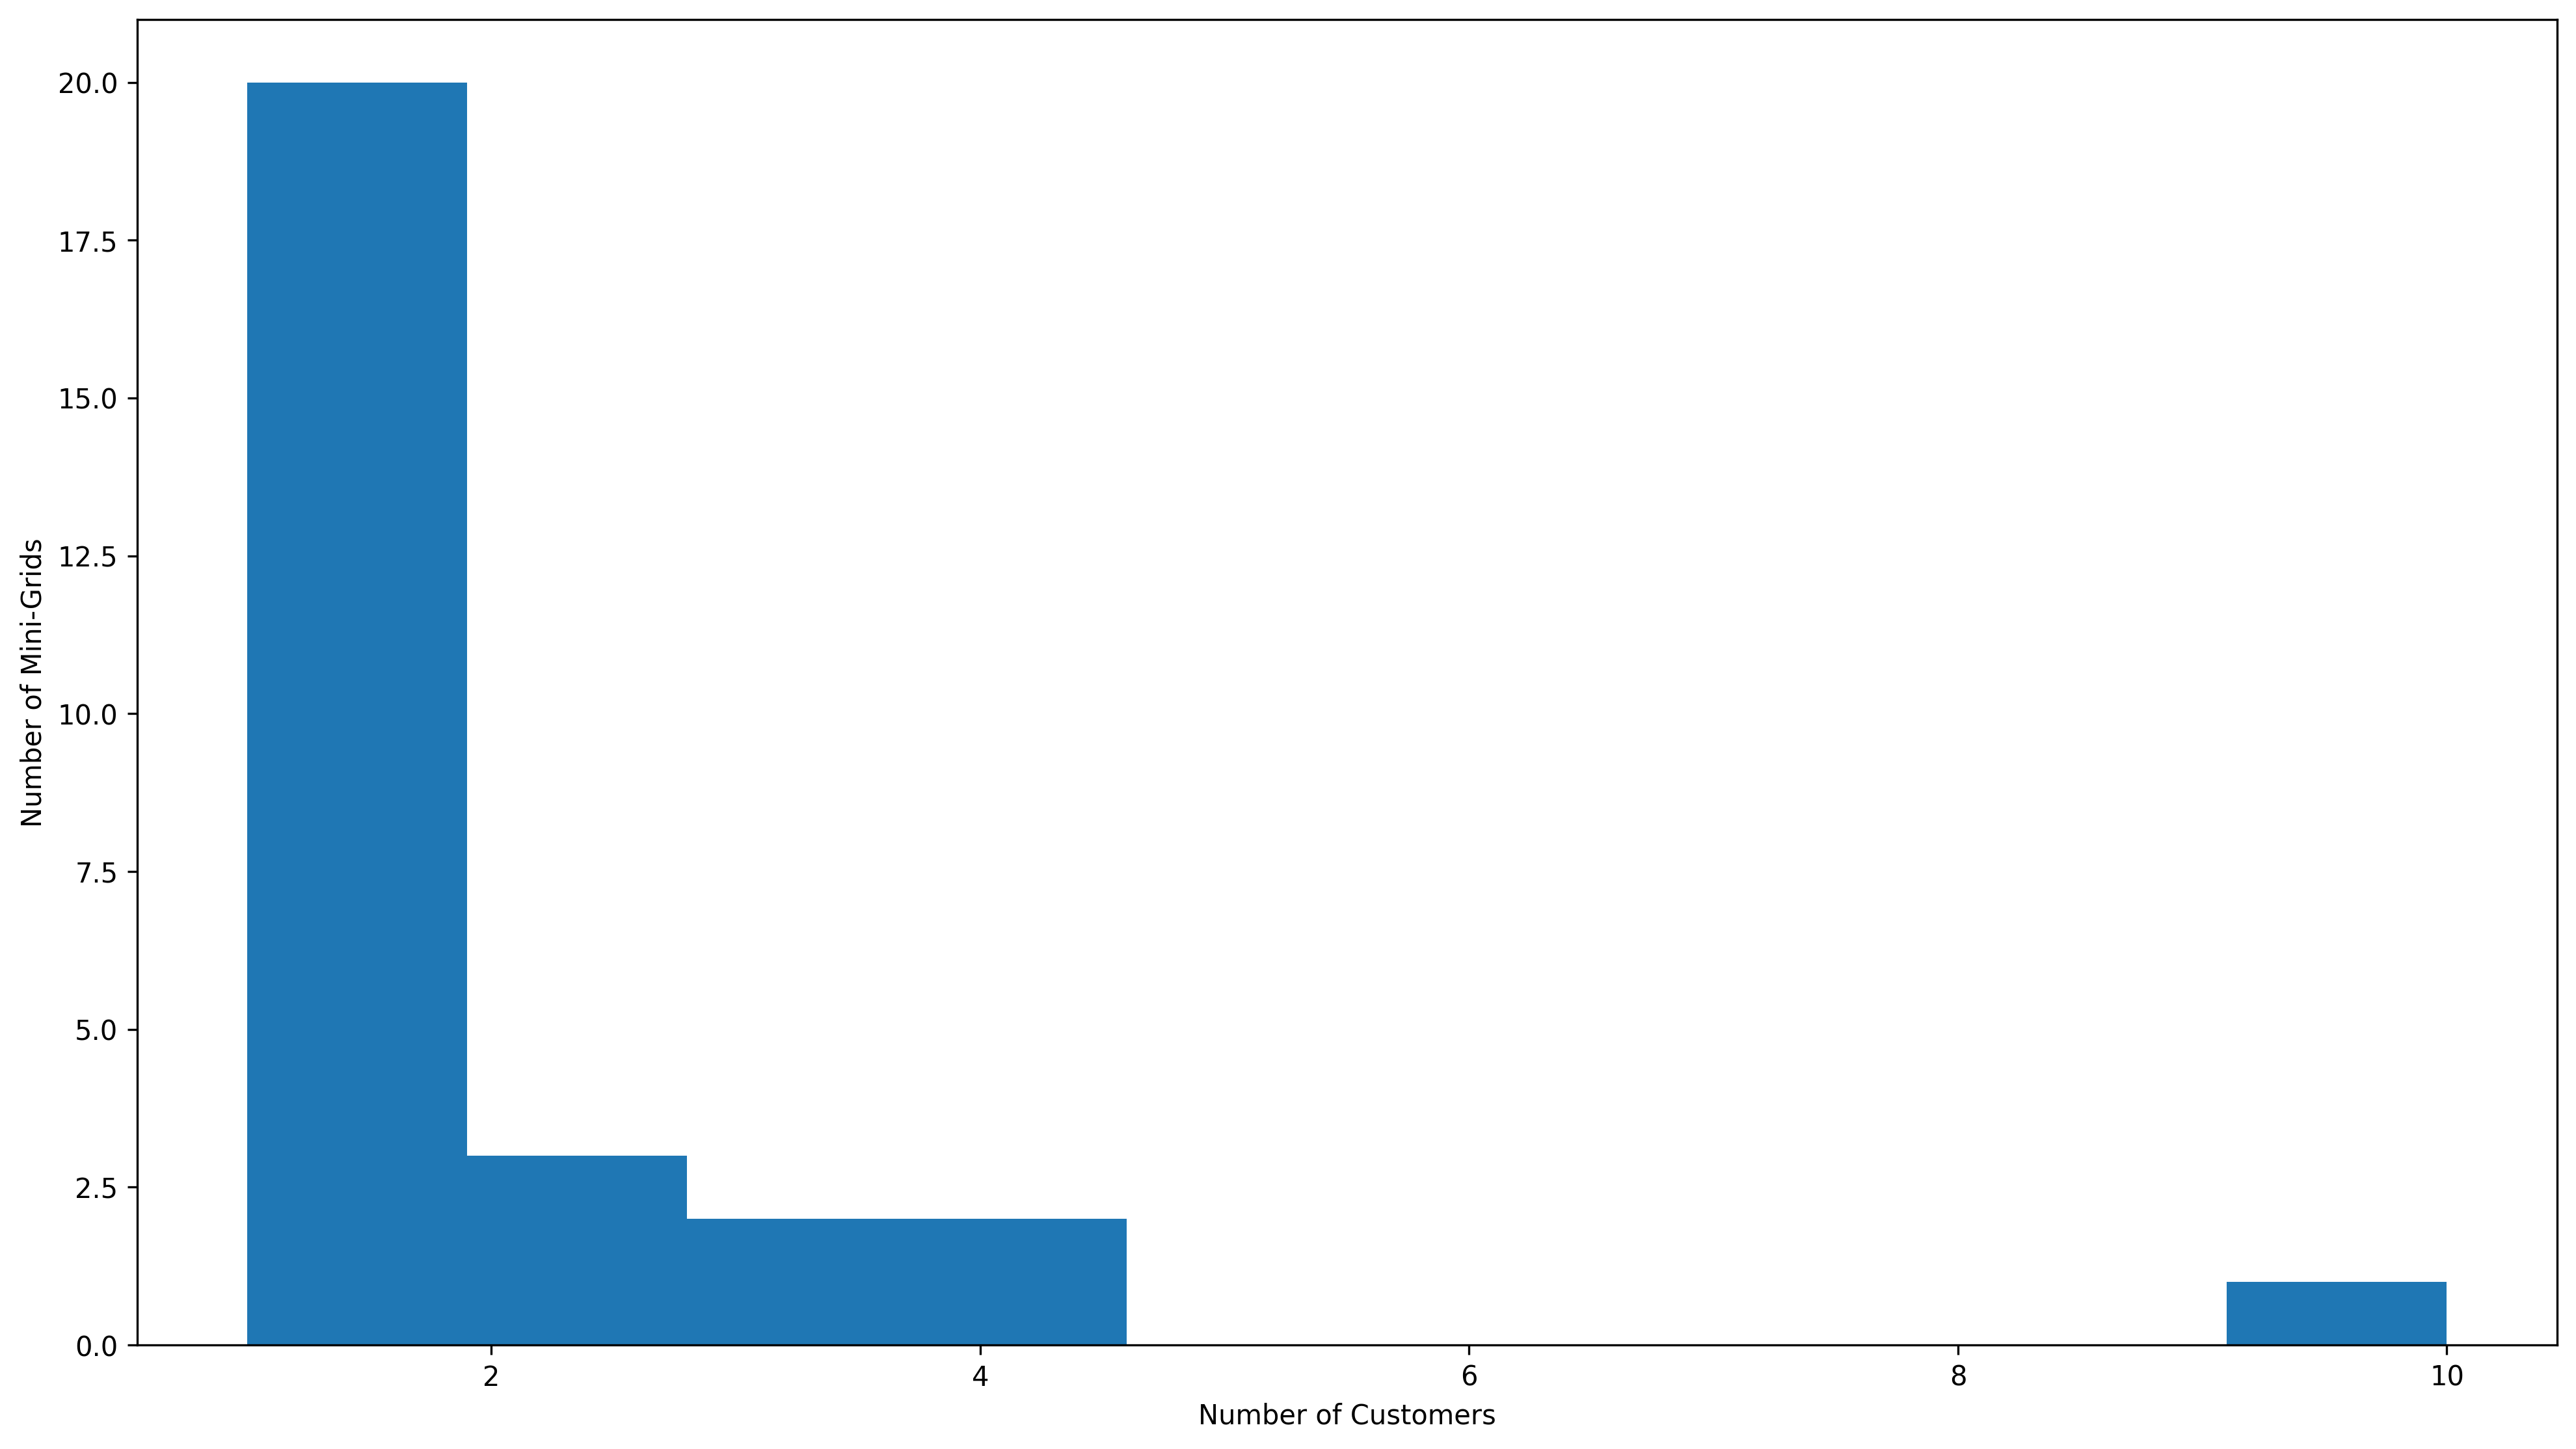

In [12]:
plt.hist(df["Cust_tot"].value_counts())
plt.xlabel("Number of Customers")
plt.ylabel("Number of Mini-Grids")
plt.show()

# Payment Methods
We can also explore the payment methods used by the customers of the mini-grids. Let's create a pie chart to visualize the distribution of payment methods.

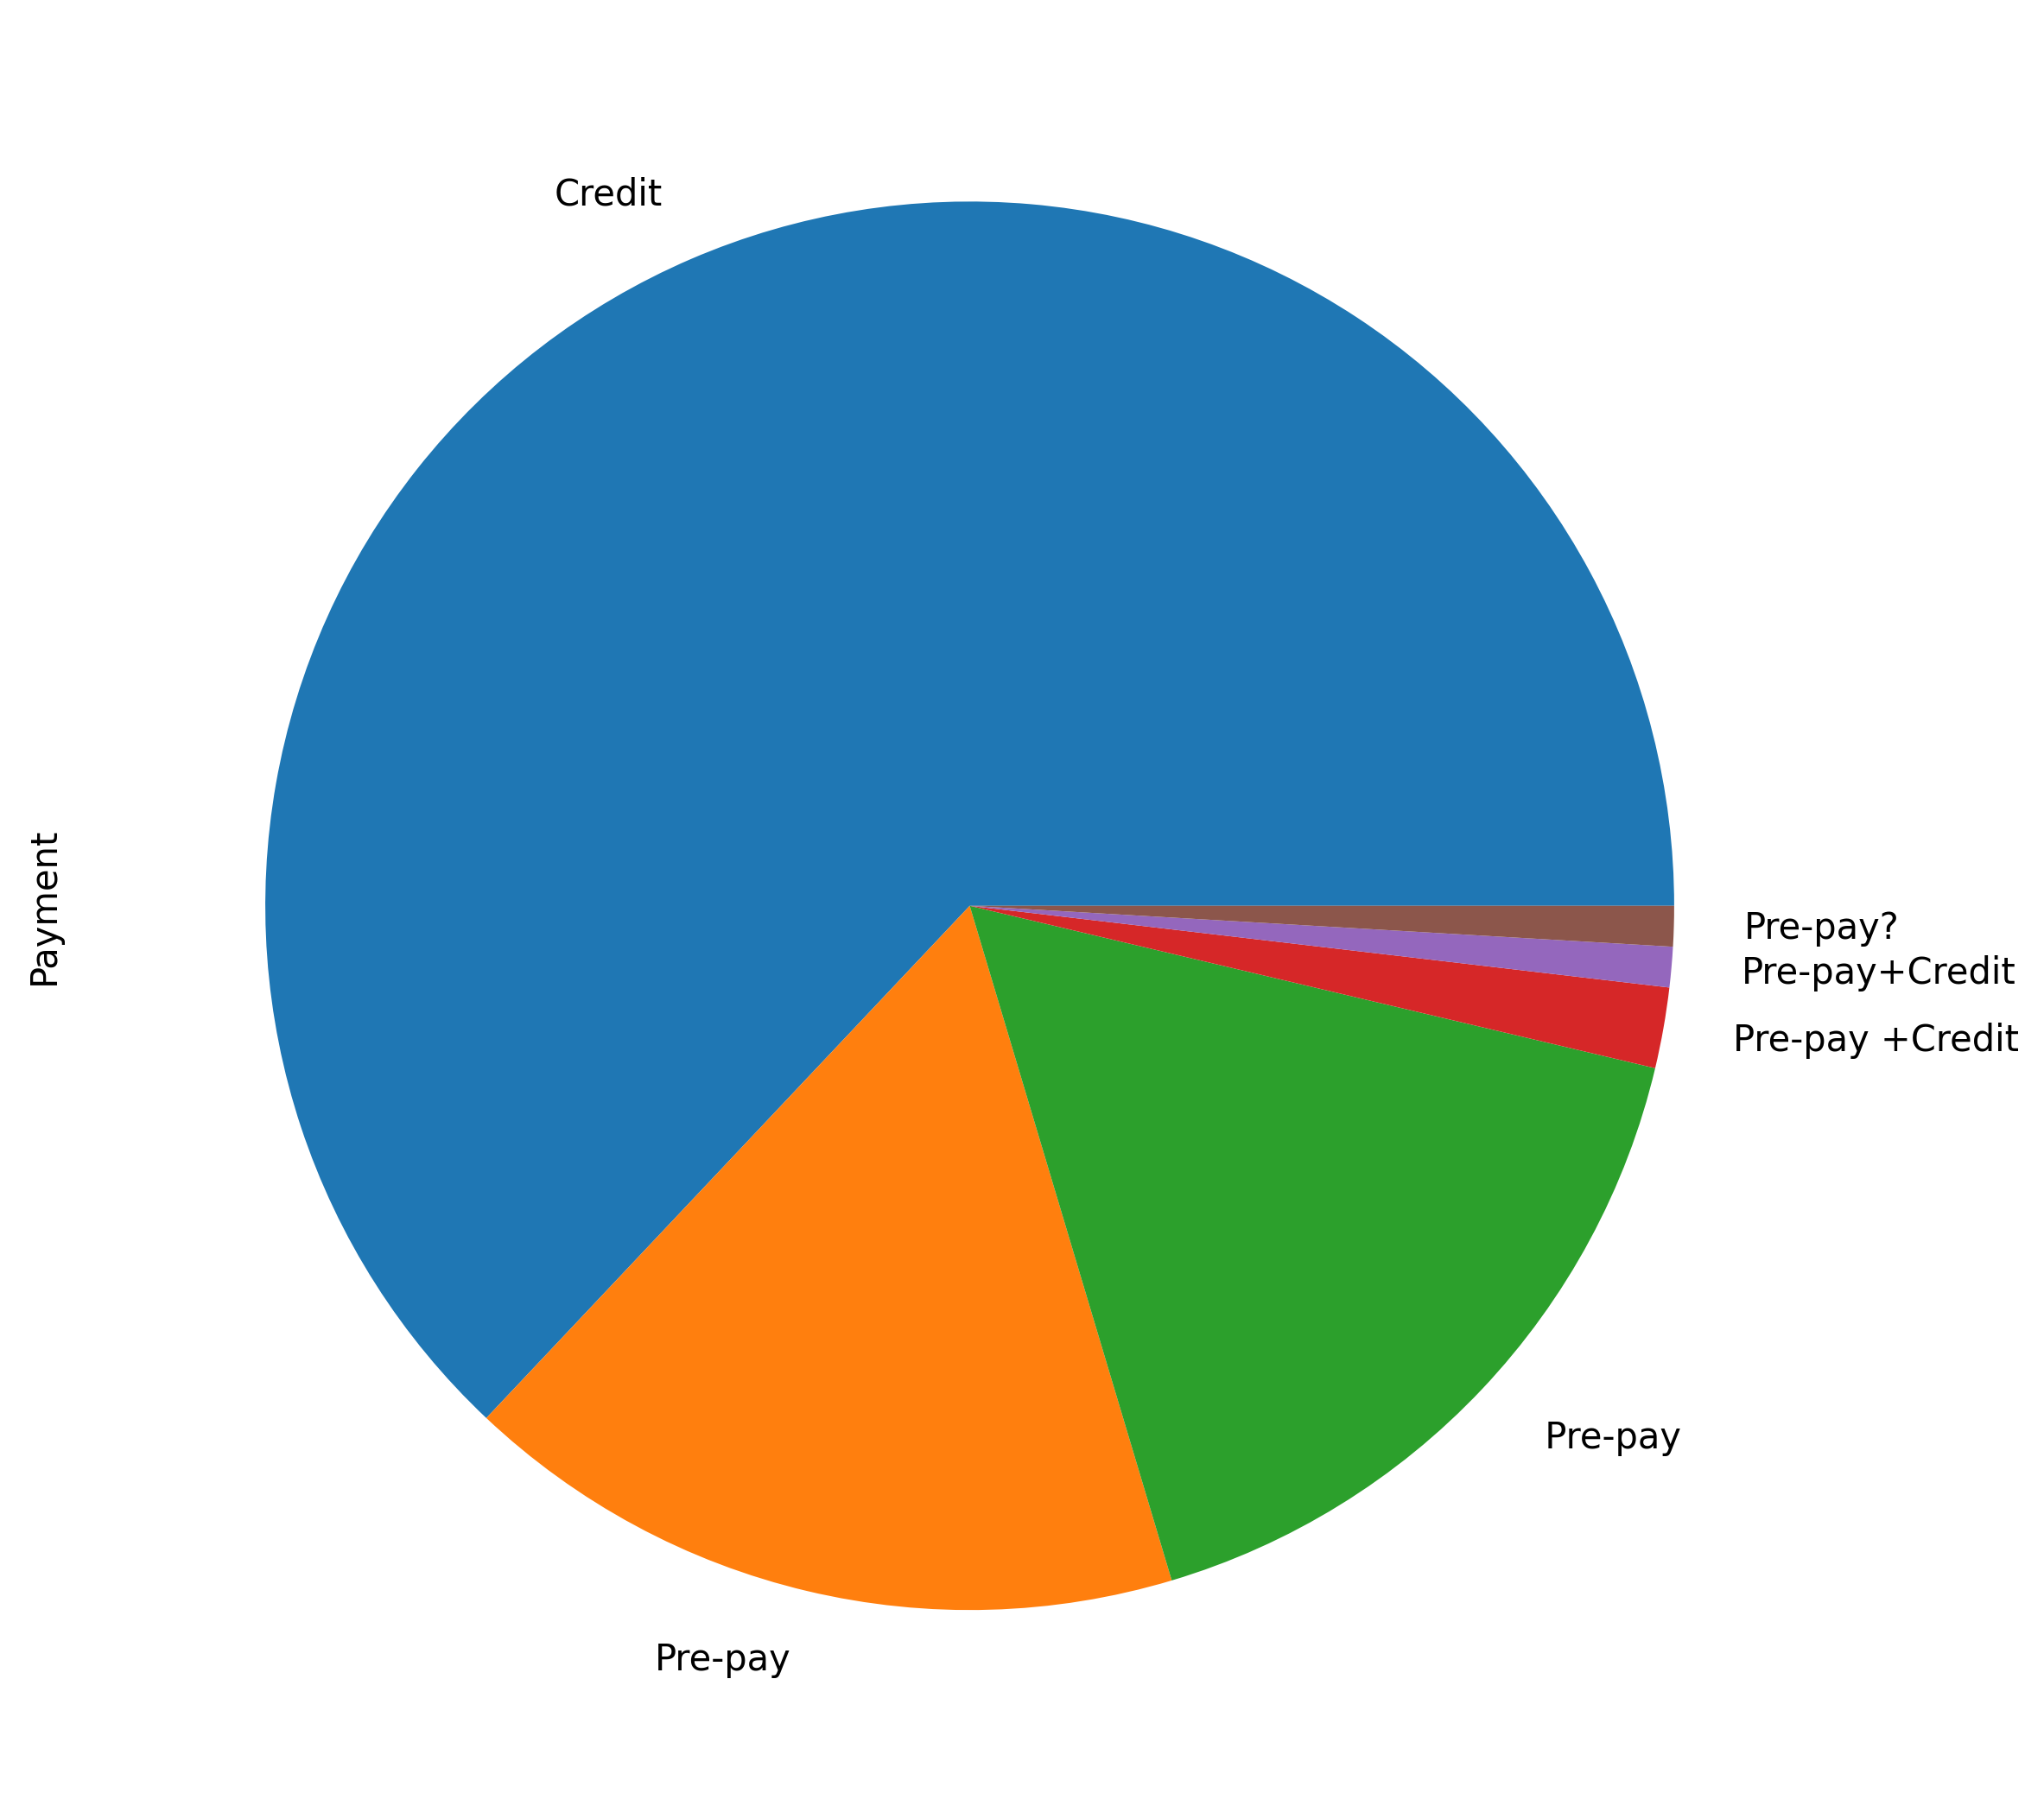

In [13]:
payment_counts = df["Payment"].value_counts()
payment_counts.plot(kind="pie")
plt.show()

# Infrastructure
Finally, we can investigate the infrastructure of the mini-grids. Let's start by looking at the number of generator sets in each mini-grid.

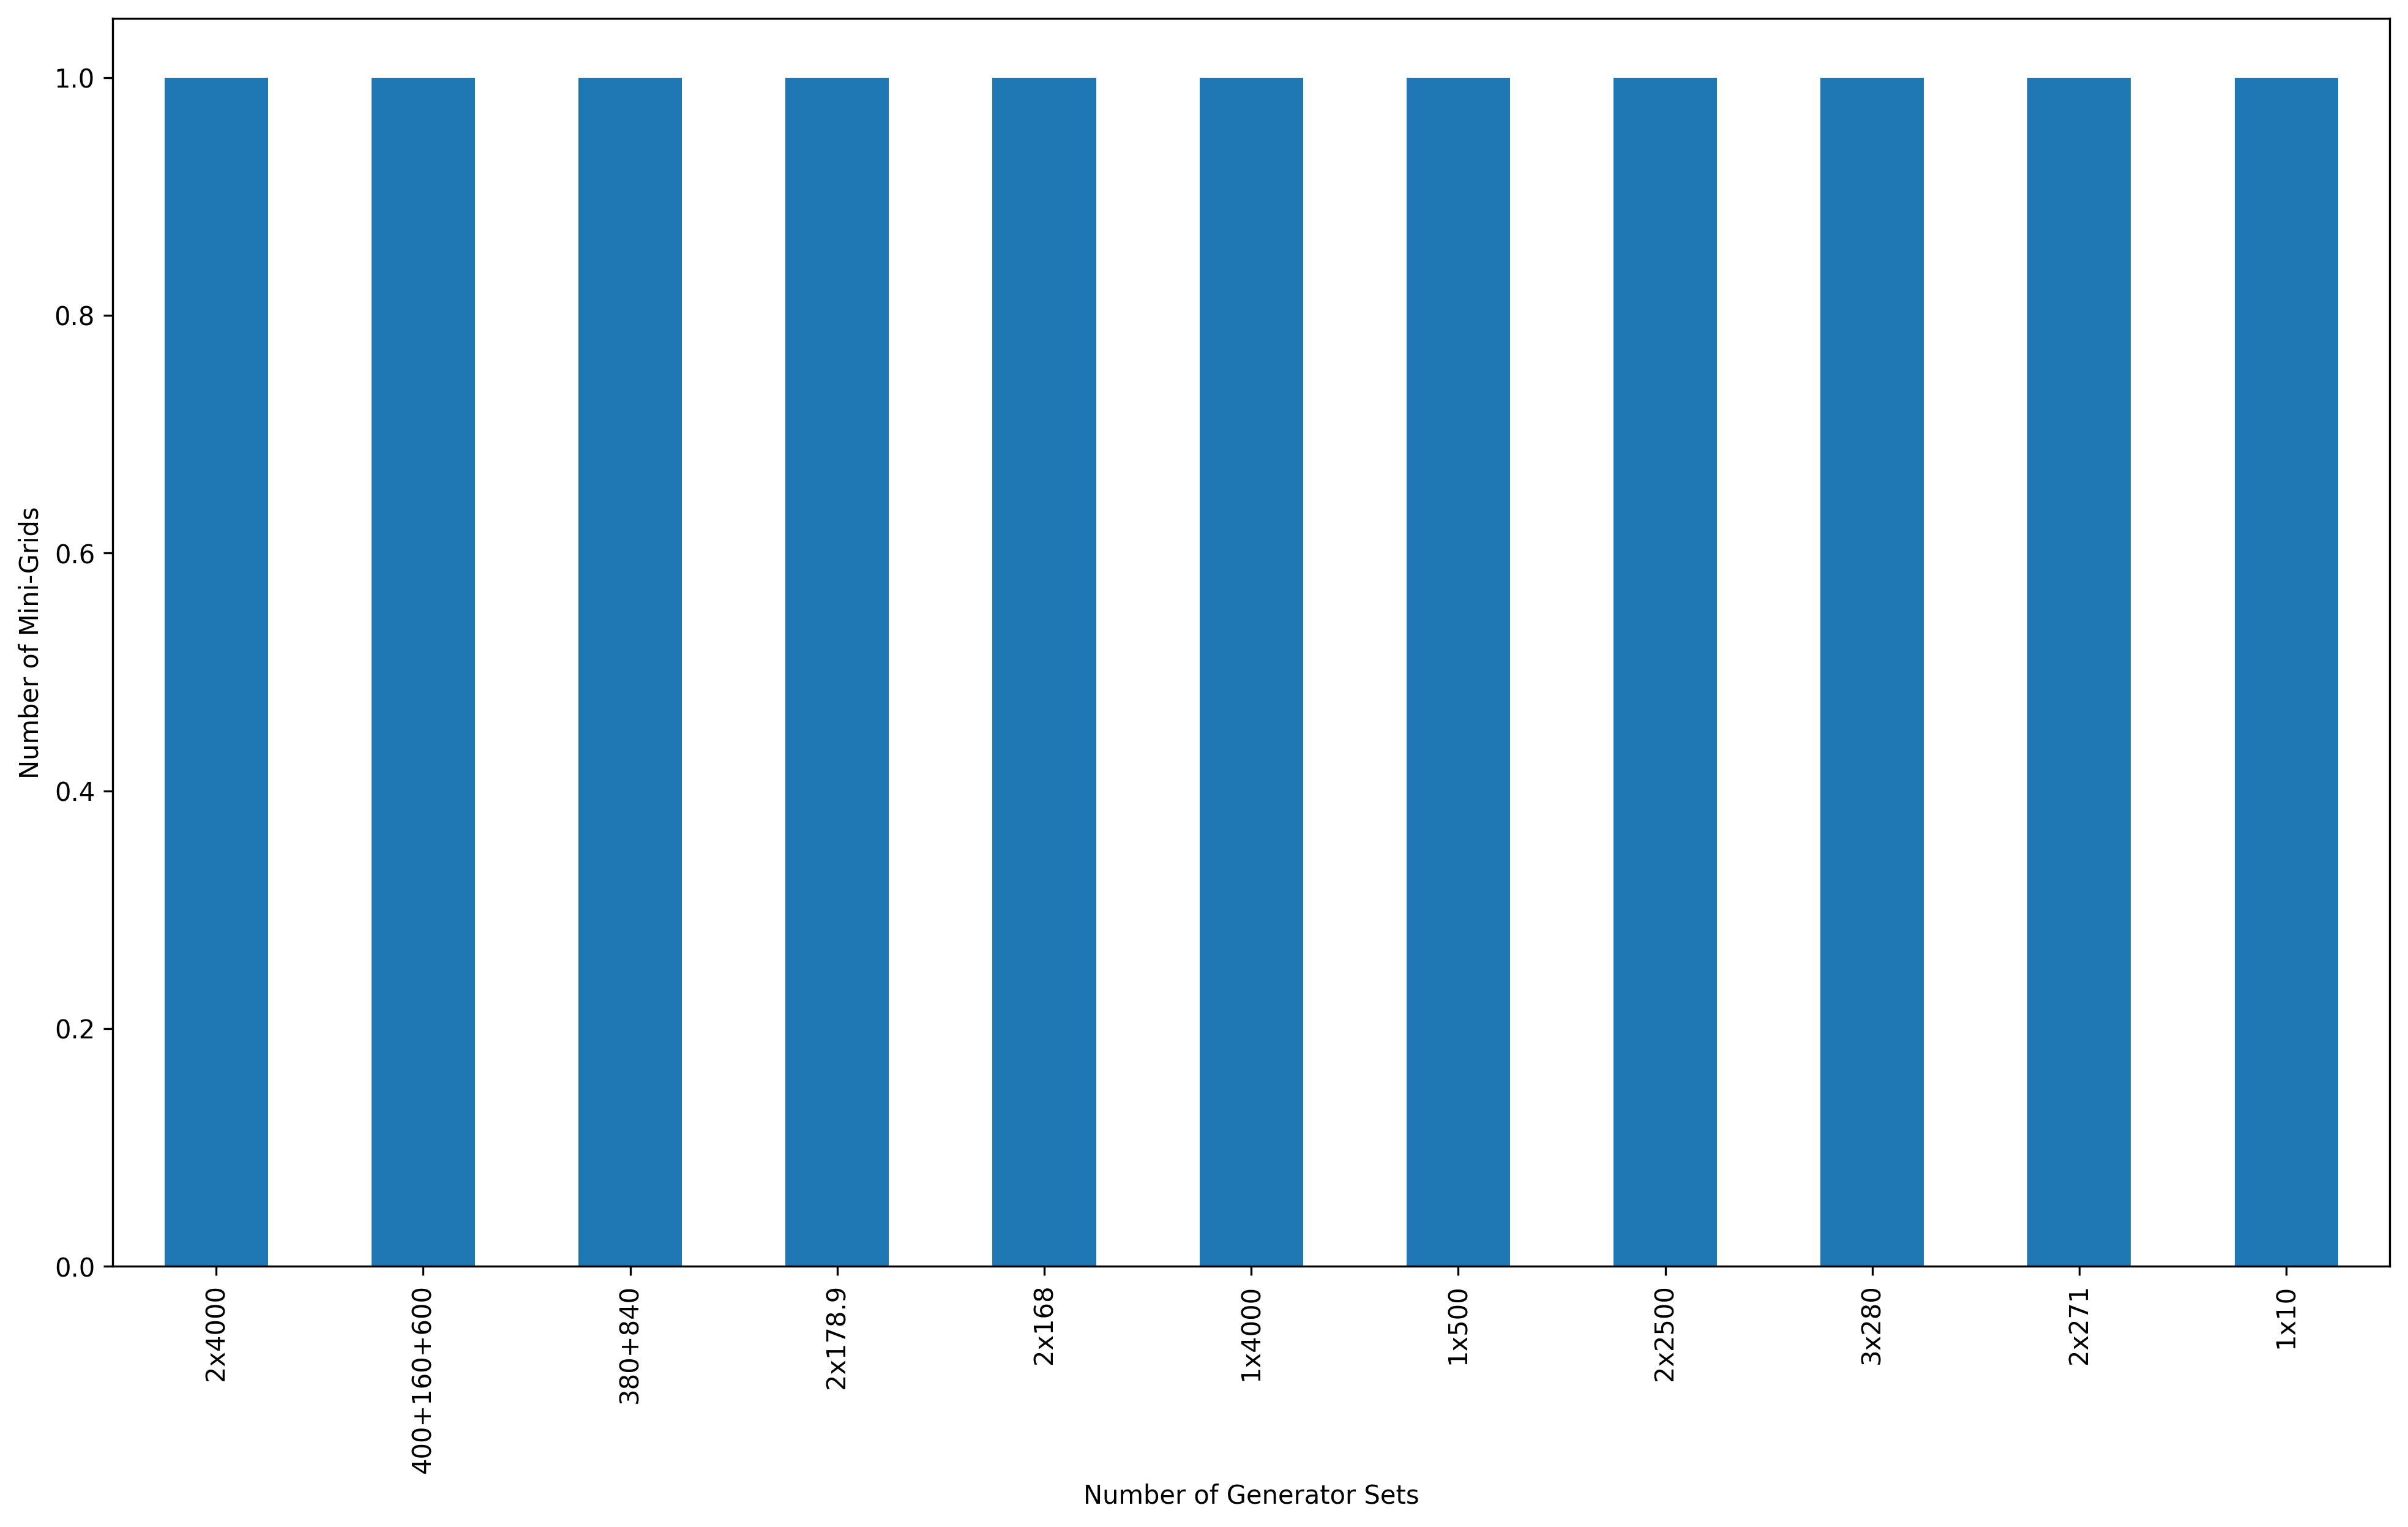

In [14]:
genset_counts = df["Num_gensets"].value_counts()
genset_counts.plot(kind="bar")
plt.xlabel("Number of Generator Sets")
plt.ylabel("Number of Mini-Grids")
plt.show()